In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# 데이터 불러오기
bankruptcy = pd.read_csv('bankruptcy_data.csv')
bankruptcy[:10]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


In [3]:
# 6819개의 샘플과 96개의 특성
bankruptcy.shape

(6819, 96)

In [4]:
# X와 y 분리
X = bankruptcy.drop('Bankrupt?', axis=1)
y = bankruptcy['Bankrupt?']

### 주성분 분석(PCA)을 통한 차원 축소

In [5]:
from sklearn import preprocessing

# 평균 0, 분산 1이 되도록 X 데이터 스케일 조정
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_pd = pd.DataFrame(X_scaled)
X_scaled_pd

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,...,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,0.0,-0.622067
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,...,-0.309033,-0.049491,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,0.0,-0.535573
2,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,...,-0.820510,-0.049491,-0.005984,-0.383698,-0.249820,0.679247,-0.062961,-0.125015,0.0,-0.621960
3,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,-0.011077,...,-1.691222,-0.049491,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-0.052562,0.0,-0.471826
4,-0.661778,-0.307745,-0.508050,-0.541238,-0.540708,0.016758,0.013703,0.016186,-0.013254,0.013300,...,-0.316008,-0.049491,-0.032052,-0.541255,-0.029564,-0.128014,-0.178037,0.776395,0.0,-0.241715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,-0.189395,-0.291959,-0.168181,-0.206277,-0.204969,0.018215,0.017036,0.018197,-0.010092,0.016277,...,-0.194231,-0.049491,-0.024011,-0.206217,-0.002968,-0.052524,-0.030437,0.063215,0.0,-0.353693
6815,-0.494676,-0.310237,-0.477627,-0.569328,-0.568828,0.018223,0.017455,0.017919,-0.009248,0.016145,...,-0.198659,-0.049491,0.001317,-0.569333,-0.006633,-0.154404,-0.033992,0.049970,0.0,-0.185856
6816,-0.534845,-0.379194,-0.534996,0.147411,0.135029,0.017628,0.016412,0.017153,-0.009919,0.013012,...,-0.247517,-0.049491,0.019653,0.147305,-0.018166,-0.316446,-0.047870,-0.015101,0.0,1.001206
6817,0.017875,0.019594,0.007403,-0.005811,-0.004720,0.024494,0.024099,0.023223,-0.011175,0.022233,...,0.100366,-0.049491,0.003493,-0.005931,0.046934,-0.194852,-0.045898,-0.004270,0.0,-0.071364


In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=4)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

print("SMOTE 후 X와 y : ", X_smote.shape, y_smote.shape)

SMOTE 후 X와 y :  (13198, 95) (13198,)


In [7]:
print("오버샘플링 전 1 : ", sum(y==1))
print("오버샘플링 전 0 : ", sum(y==0))

print("오버샘플링 후 1 : ", sum(y_smote==1))
print("오버샘플링 후 0 : ", sum(y_smote==0))

오버샘플링 전 1 :  220
오버샘플링 전 0 :  6599
오버샘플링 후 1 :  6599
오버샘플링 후 0 :  6599


In [8]:
from sklearn import preprocessing

# 평균 0, 분산 1이 되도록 X 데이터 스케일 조정
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X_smote)

X_scaled_pd = pd.DataFrame(X_scaled)
X_scaled_pd

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,-1.166948,-0.876028,-1.204315,-0.133283,-0.134383,0.021665,-0.008288,-0.004710,-0.066785,-0.020012,...,-0.820429,-0.077422,-0.085108,-0.133424,-0.155255,0.120779,-0.077640,-0.088224,0.0,-0.438850
1,0.003970,0.282806,0.078210,0.443537,0.443394,0.019183,0.044313,0.044660,0.041782,0.036440,...,0.294644,-0.077422,-0.001971,0.443746,0.125668,-0.051676,18.341250,0.525292,0.0,-0.338316
2,-0.473657,-0.116237,-0.435295,-0.133756,-0.140550,0.009712,-0.059900,-0.047093,-0.139710,-0.095941,...,0.001457,-0.077422,0.018394,-0.133683,0.051363,0.120416,-0.081193,-0.122686,0.0,-0.438726
3,-0.801417,-0.602414,-0.603576,-1.310601,-1.313657,-0.007131,0.000228,0.010988,0.017098,0.007735,...,-0.497652,-0.077422,-0.079756,-1.310710,0.003053,-0.109328,-0.070209,-0.026790,0.0,-0.264221
4,0.013108,0.285026,0.142553,-0.308981,-0.310373,0.022085,0.042808,0.044960,0.032064,0.041214,...,0.290647,-0.077422,-0.016069,-0.308993,0.125749,-0.196354,-0.220732,1.070379,0.0,0.003244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,-3.026431,-3.594493,-3.223812,-0.176502,-0.177674,-0.049354,-0.106576,-0.094070,-0.092951,-0.071842,...,-4.251207,-0.077422,-0.002732,-0.176623,-1.689655,0.468855,-0.064848,0.010406,0.0,-0.504270
13194,-1.519608,-1.263087,-1.459655,-0.389663,-0.391895,-0.005687,-0.030447,-0.017446,-0.046205,-0.030739,...,-0.907887,-0.077422,-0.004310,-0.389590,-0.345319,0.458378,-0.066808,-0.002600,0.0,-0.501572
13195,-0.137455,0.092813,-0.028952,-0.660144,-0.662120,0.017295,0.039567,0.041746,0.036918,0.038685,...,0.170413,-0.077422,-0.104571,-0.659929,0.099109,0.031320,-0.088265,-0.246698,0.0,-0.398089
13196,-1.246593,-1.074802,-1.232326,-0.502263,-0.503976,0.003053,-0.024937,-0.017820,-0.055849,-0.030852,...,-0.996182,-0.077422,-0.034614,-0.502118,-0.084073,-0.091893,-0.072059,-0.040941,0.0,-0.290738


In [22]:
from sklearn.decomposition import PCA

# 특성 수를 20개로 축소
pca = PCA(n_components=20)
pca.fit(X_smote)
X_pca = pca.transform(X_smote)

print("원본 데이터 : {}".format(str(X_scaled.shape)))
print("축소 데이터 : {}".format(str(X_pca.shape)))

원본 데이터 : (13198, 95)
축소 데이터 : (13198, 20)


In [10]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.2975342  0.13237753 0.07216801 0.05478385 0.03563934 0.03077037
 0.02557468 0.02444233 0.01872651 0.01824649 0.01515915 0.01407937
 0.01347312 0.01320821 0.01276634 0.01178343 0.01076785 0.01001982
 0.00930212 0.00898702]
0.8298097295026323


In [11]:
columns = []

for i in range(1, 21):
    columns.append('pc{}'.format(i))
    
X_pca_pd = pd.DataFrame(X_pca, columns=columns)
X_pca_pd

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20
0,2.027363,-3.910166,-0.107828,-1.396596,-2.243380,-0.254297,-0.218584,-0.099528,0.306661,-0.924690,-0.817264,0.639503,0.208213,-0.918971,-0.328656,0.283133,0.272116,0.769428,0.897333,0.128435
1,-0.760578,0.531163,-0.416454,0.014445,-2.892824,-0.889193,1.601201,-0.413348,-0.023995,-0.481971,0.181823,-0.267447,0.189212,-1.844794,-0.407878,0.296450,0.600465,-0.945844,0.799264,-0.820169
2,-0.032873,-1.081253,0.738003,-1.501904,-2.529298,-1.082878,-1.064179,0.814804,1.861513,9.792008,-0.277032,-0.790613,-0.519023,-0.731729,1.360789,0.204748,-0.111239,-0.597529,0.723346,-0.440914
3,0.291304,-2.395886,-0.380005,-1.164746,-3.529054,-0.289439,1.252487,-0.161731,-0.878520,-0.901633,-1.106016,0.483891,-0.136649,0.213463,0.370902,0.511421,-1.838995,-0.167348,-0.608468,-0.456164
4,-0.967471,0.379024,-0.234731,-0.149330,-0.663601,0.284599,-0.806995,0.173921,-0.553383,-0.736176,-0.695383,0.112885,0.038784,0.518285,0.372557,0.296678,-1.546258,0.906355,-1.136788,-0.559420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,7.238453,-11.234334,0.253265,-6.176705,3.279612,1.948020,1.184348,0.218225,0.590471,-0.602288,-1.927925,1.337570,-0.107530,-0.641008,-0.206036,0.757509,-1.114885,1.212975,2.418801,0.128656
13194,3.639586,-4.403448,0.164785,-2.428330,0.354808,-0.129853,-0.845922,-0.193439,-0.286709,-0.140085,0.367299,-1.106141,-0.330093,0.927683,-0.465388,-0.414777,1.385050,-0.018320,1.302194,0.128621
13195,-0.099680,-0.011009,0.159887,-0.726241,0.706722,-0.214257,-2.006168,0.388824,-0.761148,0.117366,1.214508,-1.230355,-0.176662,1.096955,0.018290,-0.510620,0.638828,-0.638865,0.214623,0.443783
13196,0.831762,-3.948008,-0.262133,-1.920209,-3.162847,0.182791,1.829093,-0.018901,-0.124600,-0.399061,-1.059023,0.751449,0.076766,-0.875873,0.341885,0.452867,-1.301896,0.187001,0.449174,-0.597700


### 로지스틱 회귀

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 훈련/검증 데이터와 테스트 데이터로 분리
X_trainval, X_test, y_trainval, y_test = train_test_split(X_pca, y_smote, stratify=y_smote, random_state=42)

print(X_trainval.shape)
print(X_test.shape)

(9898, 20)
(3300, 20)


In [13]:
# 훈련/검증 데이터를 다시 훈련 데이터와 검증 데이터로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, stratify=y_trainval, random_state=42)

print(X_train.shape)
print(X_valid.shape)

(7423, 20)
(2475, 20)


In [14]:
# C 값에 따른 로지스틱 회귀 정확도
for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    logreg = LogisticRegression(C=C)
    logreg.fit(X_train, y_train)
    score = logreg.score(X_valid, y_valid)
    print("C = {} 검증 정확도 : {:.3f}".format(C, score))

C = 0.001 검증 정확도 : 0.878
C = 0.01 검증 정확도 : 0.878
C = 0.1 검증 정확도 : 0.878
C = 1 검증 정확도 : 0.878
C = 10 검증 정확도 : 0.878
C = 100 검증 정확도 : 0.877


In [15]:
# l1 규제일 때 C 값에 따른 로지스틱 회귀 정확도
for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    logreg = LogisticRegression(C=C, solver='liblinear', penalty='l1')
    logreg.fit(X_train, y_train)
    score = logreg.score(X_valid, y_valid)
    print("C = {} 검증 정확도 : {:.3f}".format(C, score))

C = 0.001 검증 정확도 : 0.823
C = 0.01 검증 정확도 : 0.875
C = 0.1 검증 정확도 : 0.878
C = 1 검증 정확도 : 0.880
C = 10 검증 정확도 : 0.878
C = 100 검증 정확도 : 0.878


In [16]:
# C = 1
logreg = LogisticRegression(C=1)
logreg.fit(X_trainval, y_trainval)
print("로지스틱 회귀 테스트 정확도 : {:.3f}".format(logreg.score(X_test, y_test)))

로지스틱 회귀 테스트 정확도 : 0.874


In [17]:
print(logreg.coef_)

[[ 0.04555033 -1.14495278  0.33692479  0.4735315  -0.25312009 -0.10711175
  -0.29728839 -0.77896588  0.01899845  0.16963578  0.00868142 -0.53568705
  -0.79870697 -0.59056036 -0.87129983 -0.60416231 -0.22203782 -0.34669705
  -0.38651791  0.64564018]]


### 랜덤 포레스트

In [26]:
from sklearn.ensemble import RandomForestClassifier

X_trainval2, X_test2, y_trainval2, y_test2 = train_test_split(X_scaled, y_smote, stratify=y_smote, random_state=42)
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_trainval2, y_trainval2, stratify=y_trainval2, random_state=42)

forest = RandomForestClassifier(n_estimators=200, random_state=42)
forest.fit(X_train2, y_train2)
print("랜덤 포레스트 테스트 정확도 : {:.3f}".format(forest.score(X_test2, y_test2)))

랜덤 포레스트 테스트 정확도 : 0.981


(-1.0, 95.0)

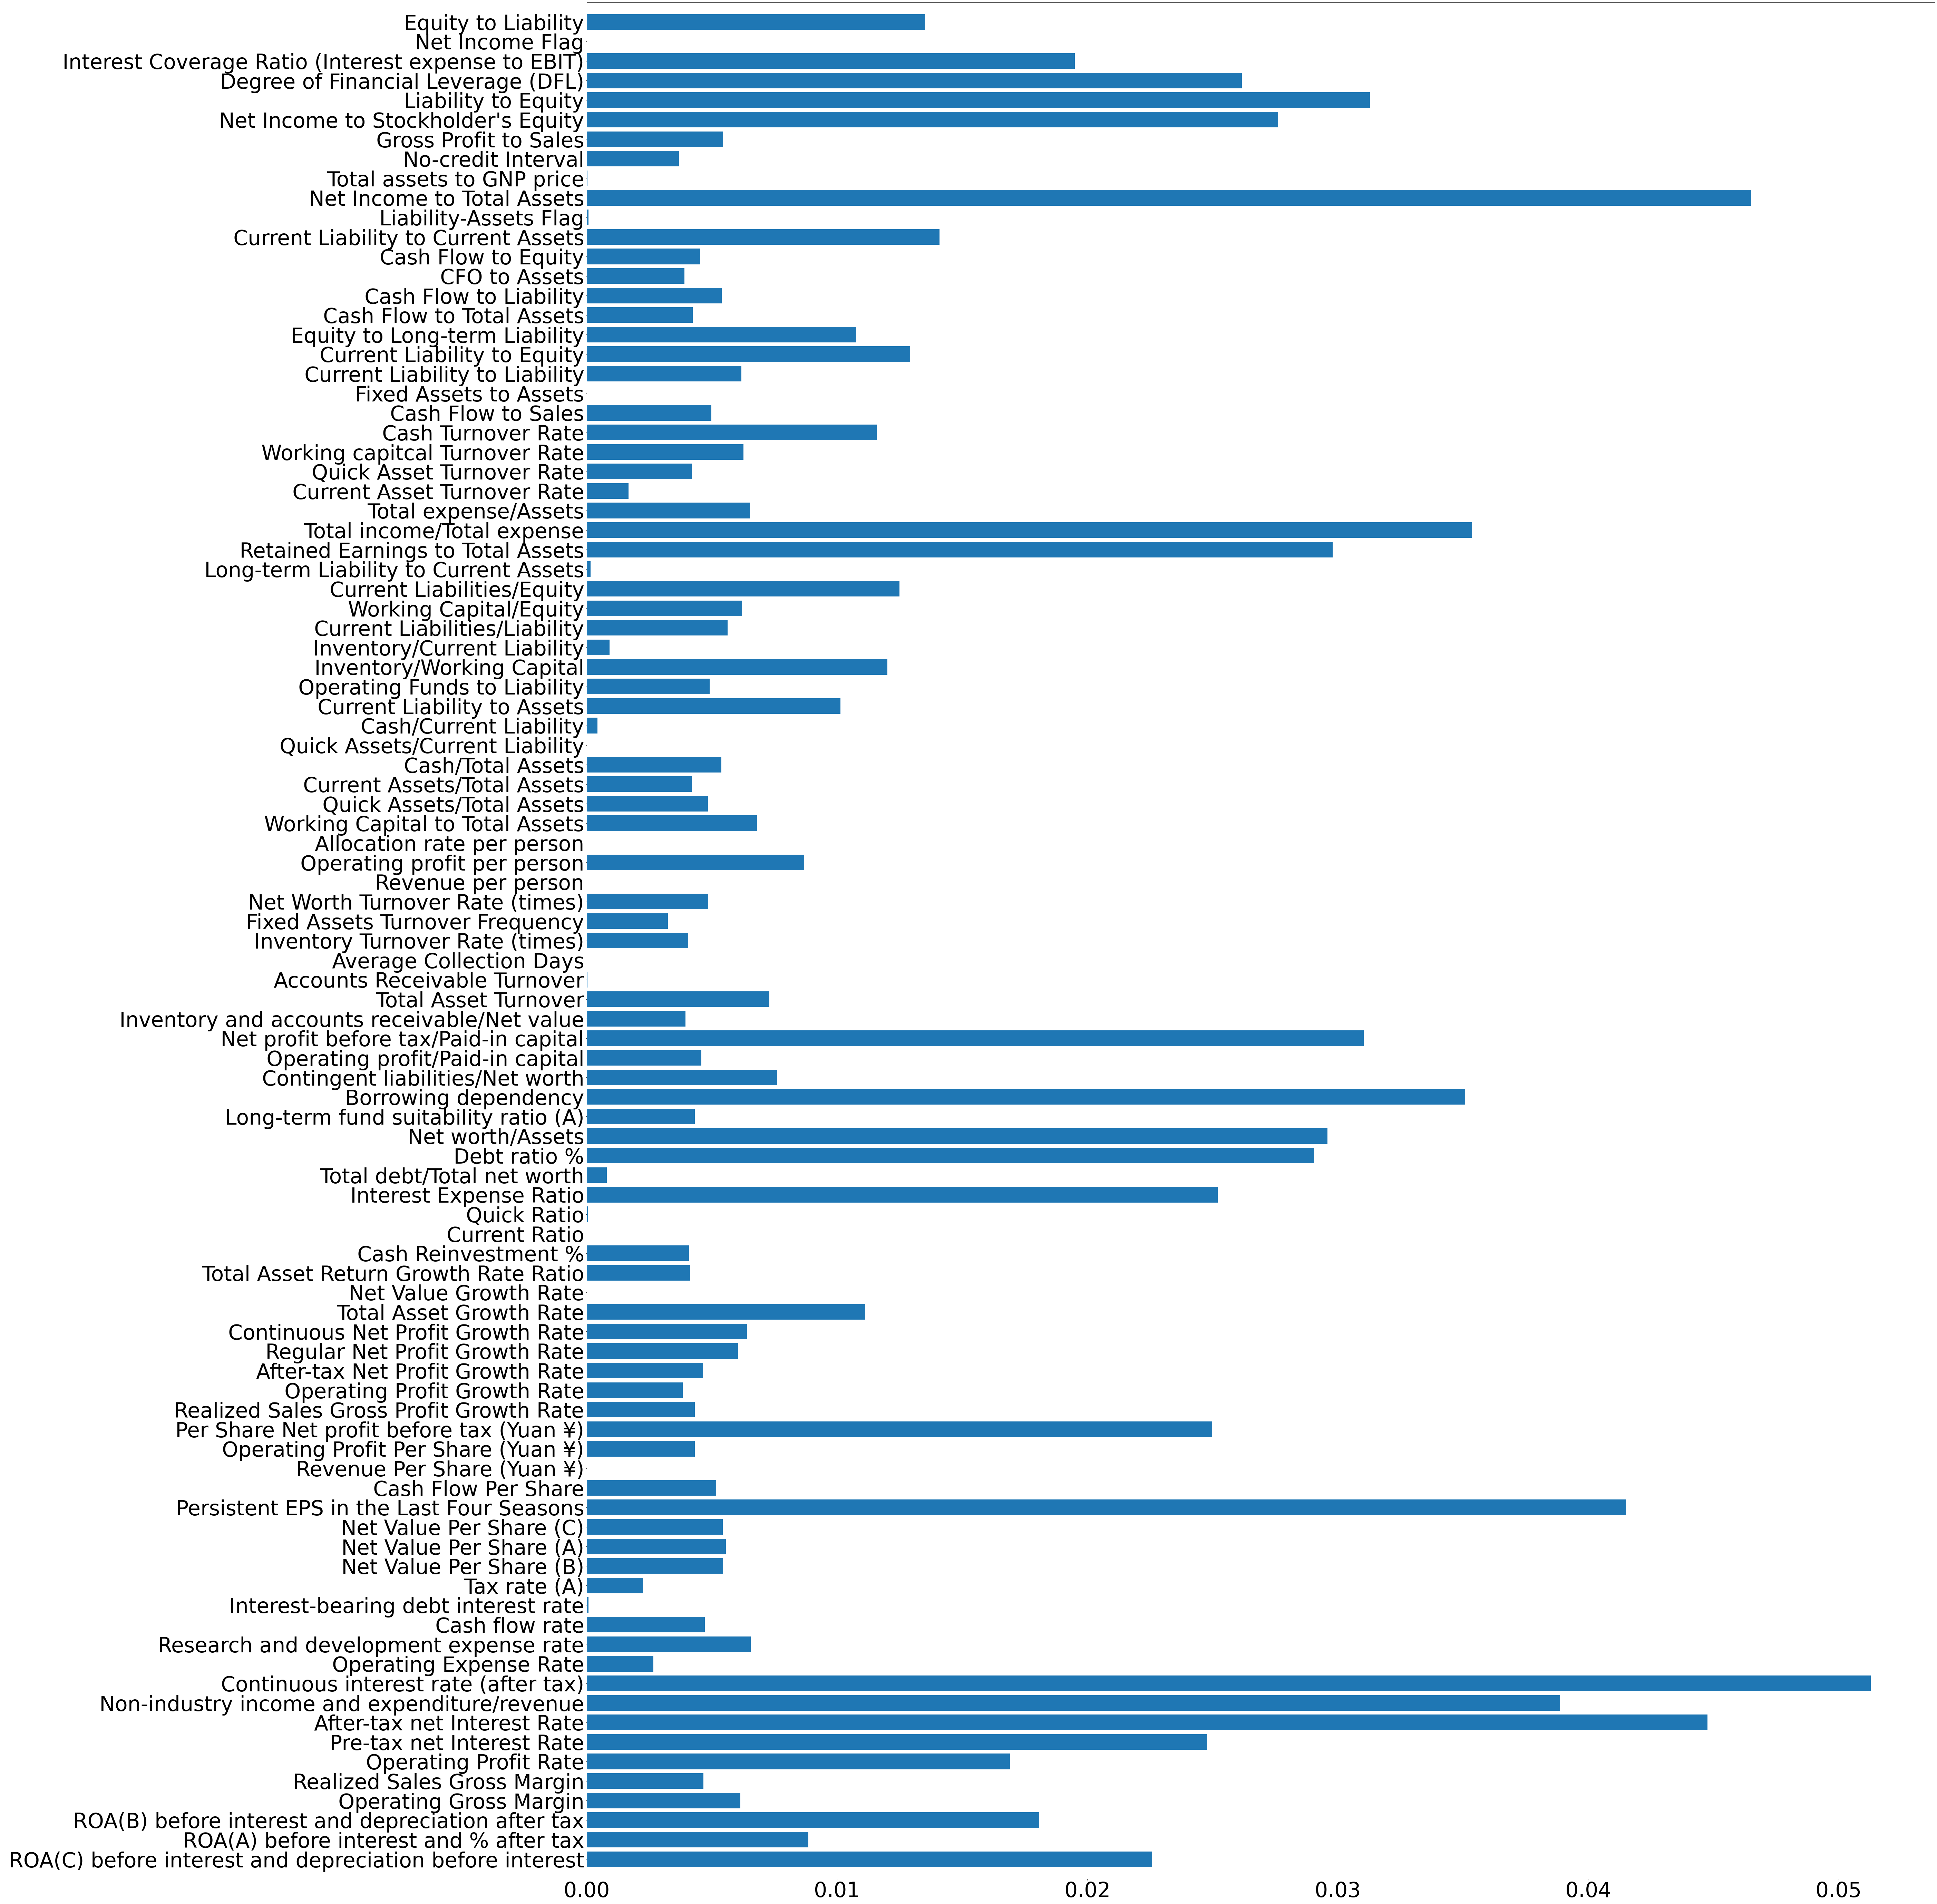

In [25]:
# 특성 중요도 시각화
plt.figure(figsize=(70, 100))
n_features = X_train2.shape[1]
plt.barh(np.arange(n_features), forest.feature_importances_, align="center")
plt.yticks(np.arange(n_features), X.columns.values, fontsize=60)
plt.xticks(fontsize=60)
plt.ylim(-1, n_features)

In [27]:
# n_estimators = 200
forest = RandomForestClassifier(n_estimators=200, random_state=42)
forest.fit(X_trainval, y_trainval)
print("랜덤 포레스트 테스트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

랜덤 포레스트 테스트 정확도 : 0.968


(-1.0, 20.0)

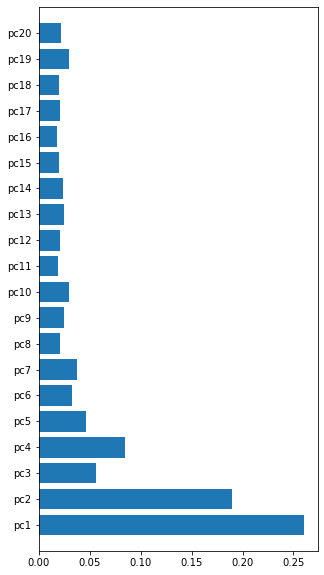

In [28]:
plt.figure(figsize=(5, 10))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features), forest.feature_importances_, align="center")
plt.yticks(np.arange(n_features), columns)
plt.ylim(-1, n_features)

### 서포트 벡터 머신

In [29]:
from sklearn.svm import SVC

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    print('\n')
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        print("gamma = {}, C = {} 검증 정확도 : {:.3f}".format(gamma, C, svm.score(X_valid, y_valid)))



gamma = 0.001, C = 0.001 검증 정확도 : 0.500
gamma = 0.001, C = 0.01 검증 정확도 : 0.869
gamma = 0.001, C = 0.1 검증 정확도 : 0.876
gamma = 0.001, C = 1 검증 정확도 : 0.883
gamma = 0.001, C = 10 검증 정확도 : 0.888
gamma = 0.001, C = 100 검증 정확도 : 0.896


gamma = 0.01, C = 0.001 검증 정확도 : 0.858
gamma = 0.01, C = 0.01 검증 정확도 : 0.868
gamma = 0.01, C = 0.1 검증 정확도 : 0.878
gamma = 0.01, C = 1 검증 정확도 : 0.894
gamma = 0.01, C = 10 검증 정확도 : 0.910
gamma = 0.01, C = 100 검증 정확도 : 0.942


gamma = 0.1, C = 0.001 검증 정확도 : 0.544
gamma = 0.1, C = 0.01 검증 정확도 : 0.835
gamma = 0.1, C = 0.1 검증 정확도 : 0.889
gamma = 0.1, C = 1 검증 정확도 : 0.944
gamma = 0.1, C = 10 검증 정확도 : 0.963
gamma = 0.1, C = 100 검증 정확도 : 0.963


gamma = 1, C = 0.001 검증 정확도 : 0.500
gamma = 1, C = 0.01 검증 정확도 : 0.500
gamma = 1, C = 0.1 검증 정확도 : 0.785
gamma = 1, C = 1 검증 정확도 : 0.931
gamma = 1, C = 10 검증 정확도 : 0.935
gamma = 1, C = 100 검증 정확도 : 0.935


gamma = 10, C = 0.001 검증 정확도 : 0.500
gamma = 10, C = 0.01 검증 정확도 : 0.500
gamma = 10, C = 0.1 검증 정확도 : 0.564
gamma = 10, 

In [30]:
# gamma = 0.1, C = 100
svm = SVC(gamma=0.1, C=100)
svm.fit(X_trainval, y_trainval)
print("서포트 벡터 머신 테스트 정확도 : {:.3f}".format(svm.score(X_test, y_test)))

서포트 벡터 머신 테스트 정확도 : 0.974


### 성능 평가

In [31]:
from sklearn.metrics import confusion_matrix

pred_logreg = logreg.predict(X_test)
logreg_confusion = confusion_matrix(y_test, pred_logreg)
print("로지스틱 회귀 오차 행렬 :\n{}".format(logreg_confusion))

로지스틱 회귀 오차 행렬 :
[[1430  220]
 [ 195 1455]]


In [32]:
pred_forest = forest.predict(X_test)
forest_confusion = confusion_matrix(y_test, pred_forest)
print("랜덤 포레스트 오차 행렬 :\n{}".format(forest_confusion))

랜덤 포레스트 오차 행렬 :
[[1566   84]
 [  20 1630]]


In [33]:
pred_svm = svm.predict(X_test)
svm_confusion = confusion_matrix(y_test, pred_svm)
print("서포트 벡터 머신 오차 행렬 :\n{}".format(svm_confusion))

서포트 벡터 머신 오차 행렬 :
[[1585   65]
 [  20 1630]]


In [34]:
from sklearn.metrics import f1_score
# F1-score : 불균형 이진 분류에서 정확도보다 나은 지표

print("로지스틱 회귀 F1 score: {:.3f}".format(f1_score(y_test, pred_logreg)))
print("랜덤 포레스트 F1 score : {:.3f}".format(f1_score(y_test, pred_forest)))
print("서포트 벡터 머신 F1 score : {:.3f}".format(f1_score(y_test, pred_svm)))

로지스틱 회귀 F1 score: 0.875
랜덤 포레스트 F1 score : 0.969
서포트 벡터 머신 F1 score : 0.975


### 교차 검증

In [35]:
from sklearn.model_selection import cross_val_score

logreg_scores = cross_val_score(logreg, X_test, y_test, cv=5)
forest_scores = cross_val_score(forest, X_test, y_test, cv=5)
svm_scores = cross_val_score(svm, X_test, y_test, cv=5)

In [36]:
print("로지스틱 회귀 교차 검증 결과 : \n{}\n".format(logreg_scores))
print("랜덤 포레스트 교차 검증 결과 : \n{}\n".format(forest_scores))
print("서포트 벡터 머신 교차 검증 결과 : \n{}\n".format(svm_scores))

로지스틱 회귀 교차 검증 결과 : 
[0.89242424 0.86363636 0.87424242 0.88030303 0.86969697]

랜덤 포레스트 회귀 교차 검증 결과 : 
[0.93939394 0.9469697  0.93636364 0.95151515 0.93333333]

서포트 벡터 머신 교차 검증 결과 : 
[0.94848485 0.92878788 0.93636364 0.95       0.92575758]

